# Working with a larger Example
When you have more than two classes as an option, it's know as a **multi-class classification problem**.

* This means if you have 3 classes, it's multi-class classification with 3 classes.
* It also means if you have 100 classes, it's multi-class classification with 100 classes.

To practice multi-class classification, we're going to build a neural network to classify images of clothing, like sneakers and shirts.

Dataset: [Fashion MNIST](http://tensorflow.org/datasets/catalog/fashion_mnist)

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been split into training and testing sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [2]:
# show the first test image
print(train_data[0])
print(train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [3]:
# check the shape of the data
train_data[0].shape, train_labels[0].shape

((28, 28), ())

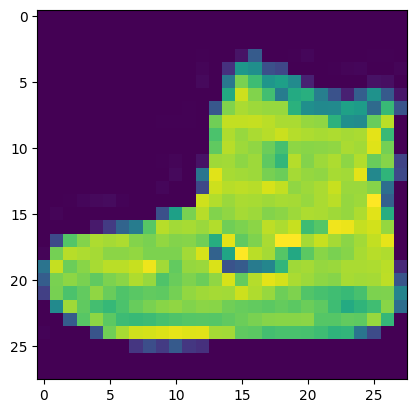

In [4]:
# Plot a single image
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [5]:
# Create a small list of class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Text(0.5, 1.0, 'Sandal')

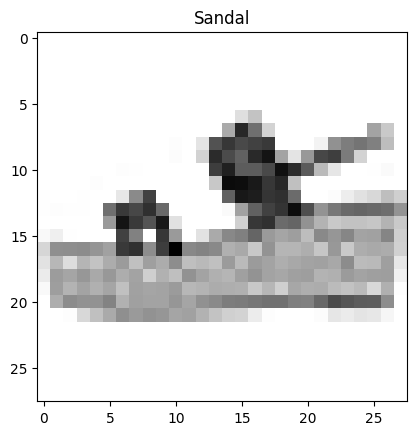

In [6]:
# Plot a single image with a class name
index_to_plot = 12
plt.imshow(train_data[index_to_plot], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_to_plot]])

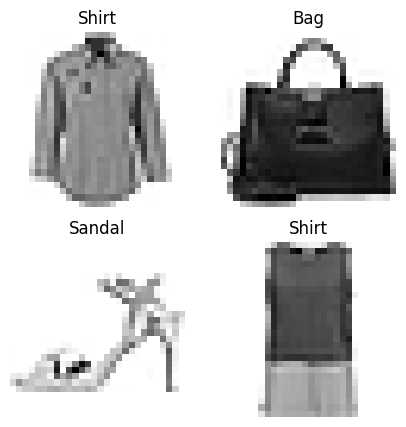

In [7]:
# Plot multiple random images
import random
plt.figure(figsize=(5,5))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model

For multi-class classification, we can use a similar model to the binary classifier, however, we'll need to make a few changes.

* Input shape = 28x28 (the shape of the image)
* Output shape = 10 (the number of classes we're trying to predict)
* Loss function = `CategoricalCrossentorpy()` with one-hot encoded labels or `SparseCategoricalCrossentropy()` with integer labels
* Output layer activation = `softmax` (because we want the output layer to output a probability distribution)

In [8]:
flatten_layer = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28))
])
flatten_layer.output_shape

(None, 784)

In [9]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
non_norm_history = model_1.fit(train_data,
                               tf.one_hot(train_labels, depth=10),
                               epochs=15,
                               validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/15
1875/1875 [==============================] - 6s 2ms/step - loss: 2.2441 - accuracy: 0.1962 - val_loss: 2.0138 - val_accuracy: 0.2071
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9283 - accuracy: 0.2412 - val_loss: 1.8884 - val_accuracy: 0.2439
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8029 - accuracy: 0.2733 - val_loss: 1.7314 - val_accuracy: 0.2842
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6161 - accuracy: 0.3184 - val_loss: 1.5424 - val_accuracy: 0.3237
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5009 - accuracy: 0.3332 - val_loss: 1.4796 - val_accuracy: 0.3329
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4664 - accuracy: 0.3387 - val_loss: 1.5095 - val_accuracy: 0.3212
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4439 - accuracy: 0.3463 - val_loss: 1.4673 - val_accuracy:

In [11]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


# Check the min and max values of the training data

In [12]:
train_data.min(), train_data.max()

(0, 255)

Neural networks work best when the data is normalized (all values are between 0 and 1).

In [13]:
# We can normalize our data by dividing it by the maximum value
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()

# Check the min and max values of the normalized training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

norm_history = model_2.fit(train_data_norm,
                           tf.one_hot(train_labels, depth=10),
                           epochs=15,
                           validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4852 - accuracy: 0.4325 - val_loss: 1.1823 - val_accuracy: 0.5169
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0517 - accuracy: 0.5691 - val_loss: 0.9912 - val_accuracy: 0.5994
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9064 - accuracy: 0.6211 - val_loss: 0.9286 - val_accuracy: 0.6197
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8229 - accuracy: 0.6767 - val_loss: 0.8201 - val_accuracy: 0.6918
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7603 - accuracy: 0.7046 - val_loss: 0.7794 - val_accuracy: 0.7086
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7259 - accuracy: 0.7326 - val_loss: 0.7650 - val_accuracy: 0.7392
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6892 - accuracy: 0.7605 - val_loss: 0.7148 - val_accuracy:

<AxesSubplot: title={'center': 'non_norm_history data'}>

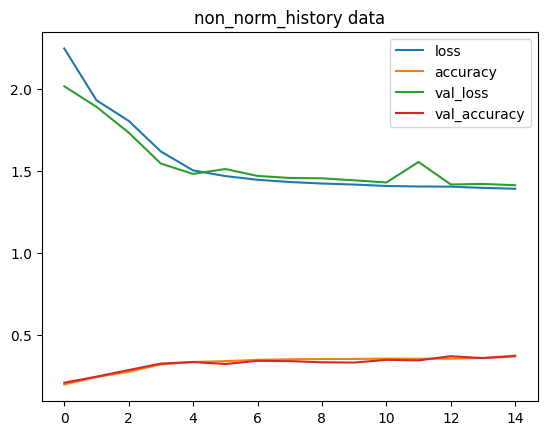

In [15]:
# plot non-normalized data loss curves
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="non_norm_history data")

<AxesSubplot: title={'center': 'Normalized data'}>

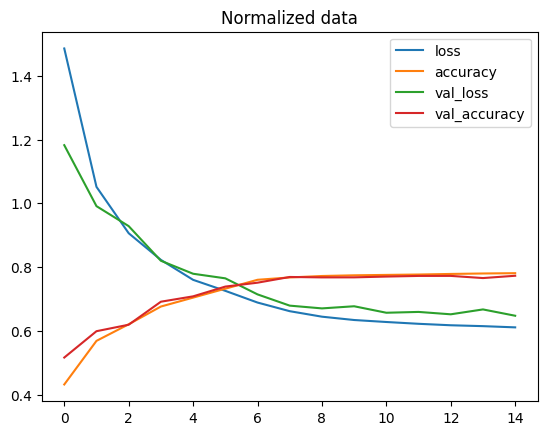

In [16]:
pd.DataFrame(norm_history.history).plot(title="Normalized data")

🔑 **Note:** The same model with event **slightly** different data can produce *dramatically* different results. So when you are comparing models, it's important to make sure you're comparing them on the same criteria (same data but different architecture, same architecture but different data, etc).

## Finding the ideal learning rate

When training a neural network, the ideal learning rate is the learning rate where the model's training loss decreases the most rapidly.

In [17]:
# Set random seed
tf.random.set_seed(42)
# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])
# 2. Compile the model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 20)) # every 20 epochs, multiply the learning rate by 10

# 4. Fit the model
find_lr_history = model_3.fit(train_data_norm,
                              tf.one_hot(train_labels, depth=10),
                              epochs=40,
                              callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9415 - accuracy: 0.3283 - lr: 1.0000e-04
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6686 - accuracy: 0.4033 - lr: 1.1220e-04
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4503 - accuracy: 0.4917 - lr: 1.2589e-04
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.2701 - accuracy: 0.5735 - lr: 1.4125e-04
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1297 - accuracy: 0.5821 - lr: 1.5849e-04
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0089 - accuracy: 0.6431 - lr: 1.7783e-04
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9073 - accuracy: 0.7198 - lr: 1.9953e-04
Epoch 8/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8267 - accuracy: 0.7404 - lr: 2.2387e-04
Epoch 9/40
1875/1875 [==========================

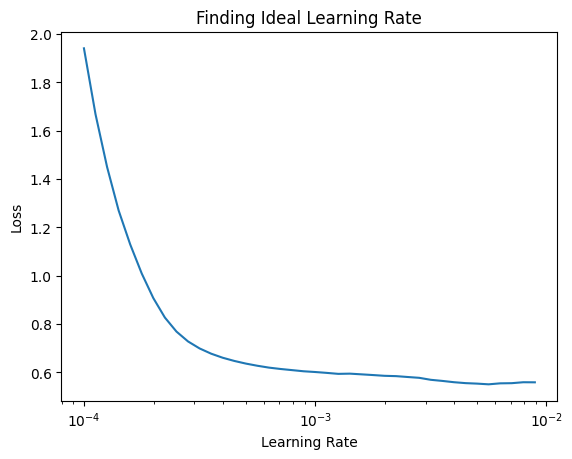

In [18]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-4 * (10 ** (np.arange(40) / 20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding Ideal Learning Rate")
plt.show()

In [19]:
10e-4

0.001

In [20]:
# Let fit a model with the ideal learning rate
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=10e-4),
                metrics=["accuracy"])

# 3. Fit the model

model_4.fit(train_data_norm,
            tf.one_hot(train_labels, depth=10),
            epochs=20,
            validation_data=(test_data_norm, tf.one_hot(test_labels, depth=10)))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2834 - accuracy: 0.4792 - val_loss: 0.9330 - val_accuracy: 0.6396
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8158 - accuracy: 0.6891 - val_loss: 0.7520 - val_accuracy: 0.7088
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6853 - accuracy: 0.7480 - val_loss: 0.6829 - val_accuracy: 0.7677
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6181 - accuracy: 0.7863 - val_loss: 0.6334 - val_accuracy: 0.7827
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5882 - accuracy: 0.7969 - val_loss: 0.6367 - val_accuracy: 0.7783
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5712 - accuracy: 0.8030 - val_loss: 0.6429 - val_accuracy: 0.7798
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5607 - accuracy: 0.8075 - val_loss: 0.5991 - val_accuracy:

In [21]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    """
    Makes a labelled confusion matrix comparing predictions and ground truth labels.
    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.
    """
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

    fig.tight_layout()

In [22]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

**Note**: Remember to make predictions on the same data you used to evaluate the model(e.g. if you train model on normalized data, you'll want to make predictions on normalized data).

In [23]:
# Make some predictions
y_probs = model_4.predict(test_data_norm) # probabilities

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 892us/step


array([[3.1996944e-05, 1.2173465e-10, 3.2063896e-09, 2.9914262e-04,
        2.5566409e-08, 1.9150312e-01, 2.1622025e-05, 1.6291448e-01,
        7.5396434e-03, 6.3768995e-01],
       [9.1732312e-03, 1.0531603e-04, 8.3417118e-01, 3.7676818e-05,
        6.4522787e-03, 0.0000000e+00, 1.5005276e-01, 6.0808839e-35,
        7.5609391e-06, 5.1033271e-25],
       [1.1620181e-06, 9.9989080e-01, 2.1682965e-05, 1.9829193e-05,
        6.5969536e-05, 0.0000000e+00, 5.1454106e-07, 0.0000000e+00,
        7.6674232e-16, 2.1217099e-36],
       [8.2709471e-07, 9.9967551e-01, 7.0592108e-07, 2.8725254e-04,
        3.5657951e-05, 0.0000000e+00, 1.4585214e-07, 1.1493073e-31,
        5.3926831e-15, 2.0283181e-29],
       [1.4218690e-01, 6.4677780e-04, 1.3964759e-01, 1.9171953e-02,
        2.5605723e-02, 1.6023120e-27, 6.6890579e-01, 2.0254498e-20,
        3.8352653e-03, 1.3980186e-14]], dtype=float32)

In [26]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)
y_preds[:5]

array([9, 2, 1, 1, 6], dtype=int64)

In [28]:
y_probs[0], class_names[np.argmax(y_probs[0])]

(array([3.1996944e-05, 1.2173465e-10, 3.2063896e-09, 2.9914262e-04,
        2.5566409e-08, 1.9150312e-01, 2.1622025e-05, 1.6291448e-01,
        7.5396434e-03, 6.3768995e-01], dtype=float32),
 'Ankle boot')

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[688,   3,  11,  79,   9,   1, 195,   0,  14,   0],
       [  0, 946,   9,  28,  13,   0,   2,   0,   1,   1],
       [  8,   3, 587,  10, 267,   0, 123,   0,   2,   0],
       [ 22,  29,   9, 815,  60,   0,  59,   0,   6,   0],
       [  0,   5,  68,  21, 833,   0,  73,   0,   0,   0],
       [  0,   0,   0,   1,   0, 905,   0,  49,  13,  32],
       [100,   1,  82,  47, 239,   0, 506,   0,  25,   0],
       [  0,   0,   0,   1,   0,  50,   0, 904,   0,  45],
       [  0,   0,   5,   8,   6,  10,  61,   5, 903,   2],
       [  0,   0,   0,   0,   0,  20,   0,  54,   8, 918]], dtype=int64)

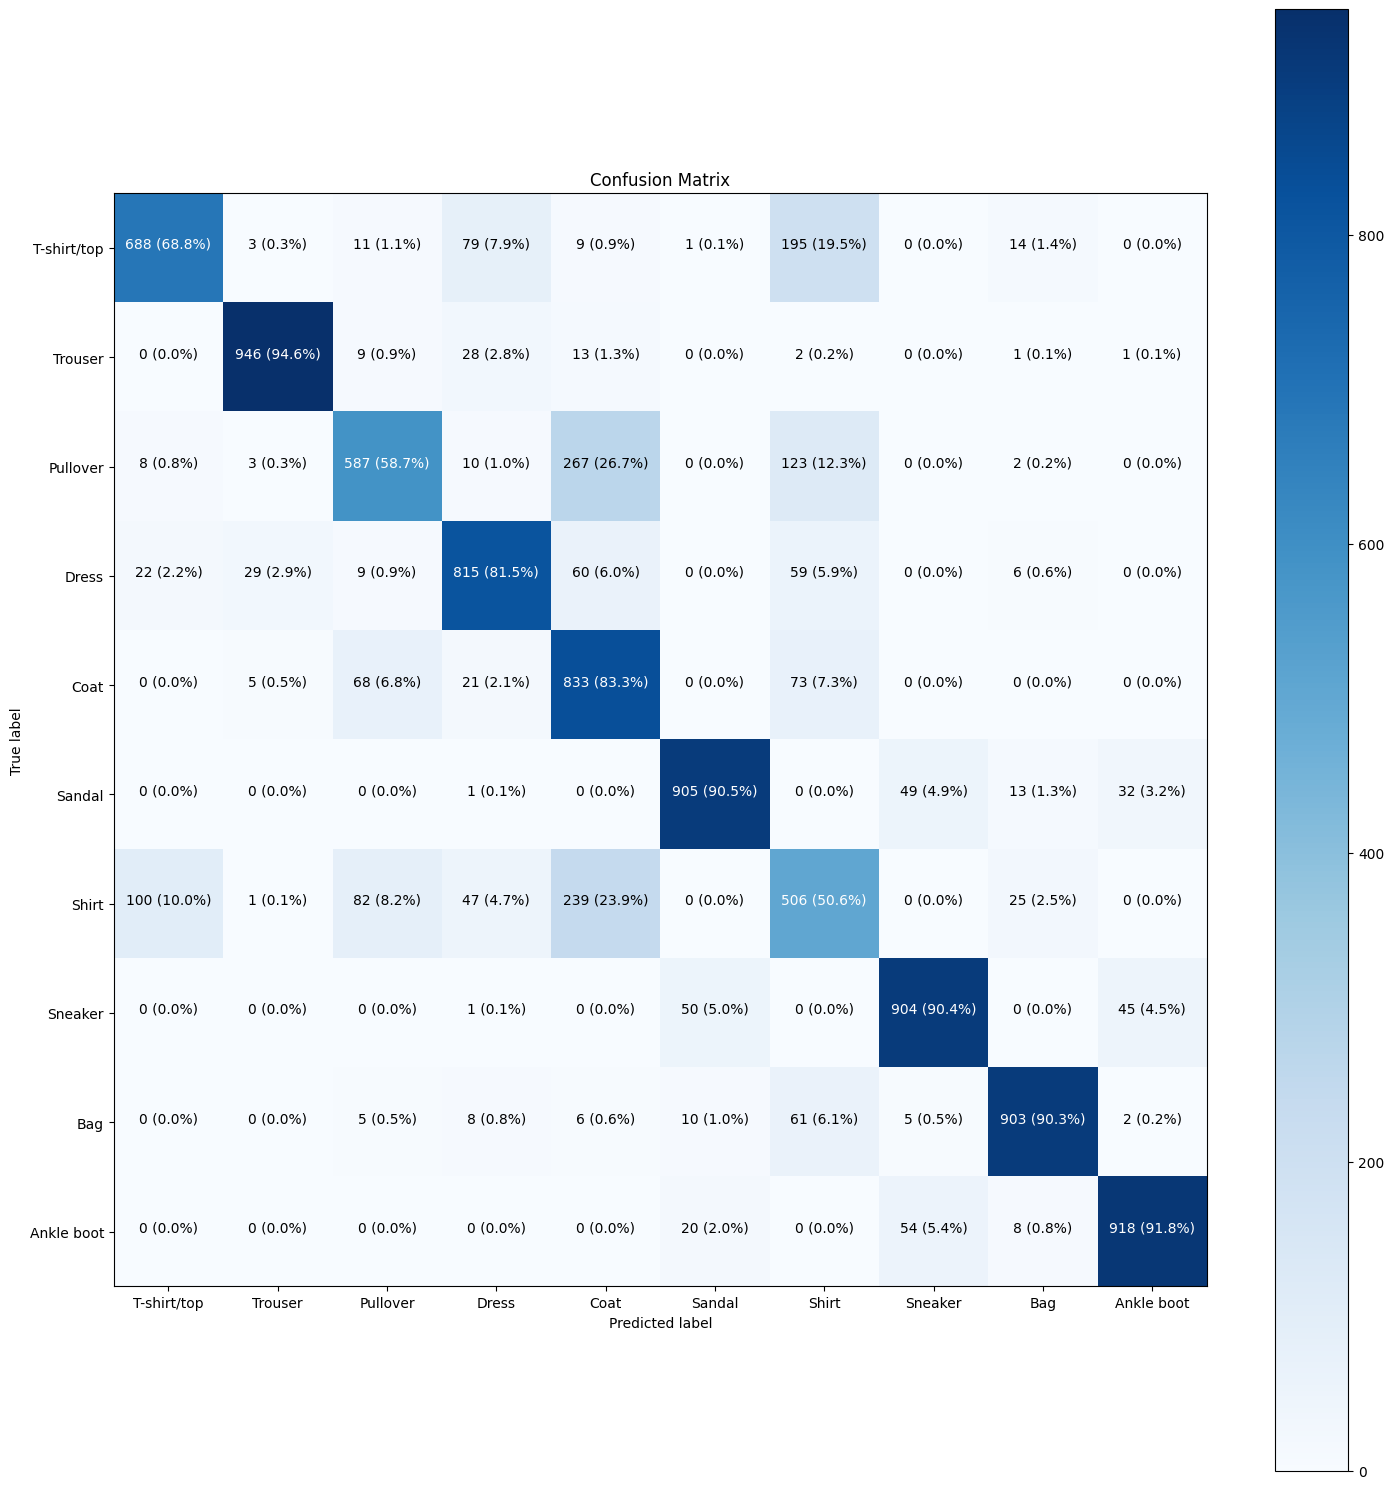

In [30]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

**Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible develop a further understanding of the data and the inputs and outputs of your model.

How about we visualize some of the predictions our model is making?
* Plot a random image from the test set
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [33]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediction and truth label.
    """
    # Set up random integer
    i = random.randint(0, len(images))

    # Create predictions and target labels
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image and add labels
    plt.imshow(target_image, cmap=plt.cm.binary)
    # Change the color of the titles depending on if prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                     100*tf.reduce_max(pred_probs),
                                                     true_label),
                                                     color=color)
    # Plot the image and add labels
    plt.imshow(target_image, cmap=plt.cm.binary)

1/1 [==============================] - 0s 13ms/step


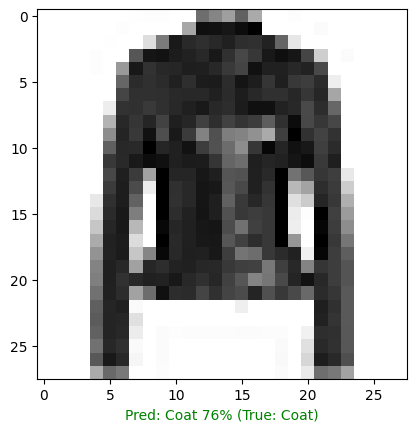

In [43]:
plot_random_image(model=model_4,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [44]:
# Find the layers in our model
model_4.layers

In [45]:
# Extract a particular layer
model_4.layers[1]

In [47]:
# Get the patterns of a layer
weights, biases = model_4.layers[1].get_weights()

# Shapes of weights and biases
weights, weights.shape

(array([[ 0.5960136 ,  0.39571312, -0.10819164, -0.81749266],
        [ 1.1564883 ,  1.0274905 ,  0.10976699, -0.70691437],
        [ 0.63720405,  0.86846155,  0.8857584 , -0.7261585 ],
        ...,
        [ 0.35669222,  1.0076487 ,  0.08627714, -0.45910636],
        [ 0.27580234,  0.3356464 ,  0.24897762, -0.48726732],
        [-0.31986463,  0.9329249 ,  0.23070538,  0.13878825]],
       dtype=float32),
 (784, 4))

In [48]:
# Biases and their shape
biases, biases.shape

(array([ 1.1718484 ,  2.7948287 ,  0.3530772 , -0.10699066], dtype=float32),
 (4,))

# Every neuron has a bias vector. Each of these is paired weight a weight matrix. The weight matrix is the same shape as the input data (in this case, 28x28).

The bias vector get initialized to 0s (at least by default in TensorFlow).
The bias vector is the same shape as the output of the layer (in this case, 4).
The bias vector dictates how much the layer should shift the output of the layer.

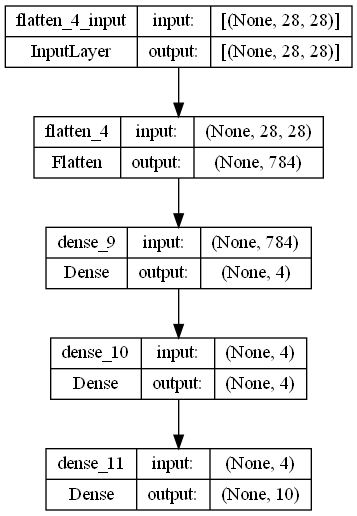

In [49]:
# Let's check out anthoer way of viewing the model's layers
from  tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes=True)